# Multiple Linear Regression - Insurance

Using multiple linear regression machine learning model to predict expenses of insurance

## Pretrain procedure

### Import data

In [78]:
import pandas as pd
df = pd.read_csv('insurance.csv')

In [79]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


### Prepare data
* Convert text value to codes using cat.codes
* Prepare X and y

In [80]:
## We convert the value of 'sex' as codes (e.g. Male/Female --> 0/1)
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes

df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [81]:
# Check null in each columns
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [82]:
# y = m1X1 + m2X2 + m3X3 + m4X4 + ... + c
X = df.drop(columns = 'expenses')
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [83]:
y = df['expenses']
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

### Splitting data

In [84]:
## Use sklearn.model_selection train_test_split function to split our datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [85]:
X_train

,age,sex,bmi,children,smoker,region
1163,18,0,28.2,0,0,0
196,39,0,32.8,0,0,3
438,52,0,46.8,5,0,2
183,44,0,26.4,0,0,1
1298,33,1,27.5,2,0,1
...,...,...,...,...,...,...
763,27,1,26.0,0,0,0
835,42,1,36.0,2,0,2
1216,40,1,25.1,0,0,2
559,19,1,35.5,0,0,1


In [86]:
y_train

1163     2200.83
196      5649.72
438     12592.53
183      7419.48
1298     5261.47
          ...   
763      3070.81
835      7160.33
1216     5415.66
559      1646.43
684      4766.02
Name: expenses, Length: 936, dtype: float64

### Prepare Machine Learning Models

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## Training the machine learning model

In [88]:
lr.fit(X_train, y_train)

LinearRegression()

In [89]:
c = lr.intercept_
c

-11827.690243440857

In [90]:
m = lr.coef_
m

array([  256.54688301,   -49.5556959 ,   329.03829593,   479.33098055,
       23399.22241438,  -276.24306229])

## Predictions

### Predictions on the training data

In [91]:
y_pred_train = lr.predict(X_train)
y_pred_train
# Equivalent to:
# y_pred_train = mVector*X_trainVector + c

array([ 2069.03359585,  8141.36511348, 18755.9087006 ,  7870.74055918,
        6319.77323677,  2023.31256548, 26863.42450343, 14926.51215619,
       10495.85929889, 16242.86056466, 11725.99370507, 11281.93339827,
       39310.00037015,  5826.58193988, 12319.08622599,  3157.93965299,
       15407.40958383,  4638.61198466,  5019.75698033,  6017.49314695,
       15364.9402173 ,  8973.68891998,  8767.32720772, 34224.46402602,
        6693.75646855, 26942.08473102, 27280.87272357, 15486.58742309,
        8811.58410991, 34400.26712291, 10167.16501979,  3890.92199565,
       15617.85872463, 29573.33802913, 29452.02427532, 28118.40509054,
       10015.30321546, 33055.63888237,  3963.91622151, 25447.54101793,
        5661.55997897, 27993.48459099,  7049.83736756, 15106.48019776,
        2569.47001823, 35456.58856451, 15254.19868735,  3190.8761776 ,
        1785.54434704, 10139.73090613,  9948.63660039, 11220.24742389,
       16775.5017179 ,  4325.19567694,  1904.54981552,  4172.84106372,
      

### Predictions on the test data

In [92]:
# lr is trained using y_train and X_train
y_pred_test = lr.predict(X_test)
y_pred_test

array([11050.75030786,  9830.58401425, 37877.60057293, 16130.94142557,
        6935.55088408,  3886.76761583,  1443.86083359, 14394.94464116,
        9019.79772728,  7470.54831663,  4584.62434316, 10302.87615916,
        8692.67256789,  4081.50136233, 27550.09068791, 11164.04066927,
       11234.95457001,  5966.04861706,  8194.77658449, 26754.38982015,
       33448.43614635, 14342.84850626, 11680.03101722, 32224.0141746 ,
        4335.79376459,  9084.71373556,  1047.98500037, 10177.9556596 ,
        4029.06121061, 10385.45072068,  9039.33404941, 40108.56139118,
       15505.96388808, 13677.23187741, 24473.94242967,  5048.8847032 ,
       12899.34942003, 30332.8849647 , 33308.28249653,  3431.49348423,
        3955.85963387,  4190.29599971, 30213.91592489, 39258.53153771,
       27778.4030602 ,  5001.76547535, 11032.4253509 ,  7754.51824821,
        3553.9859082 , 10619.24604637,  5556.3245936 ,  3388.61886944,
       32699.90093916, 38300.73692497, 16286.24744589,  6954.02246071,
      

### Visualizing and Comparing the actual charges and predict charges

Text(0, 0.5, 'Predict charges')

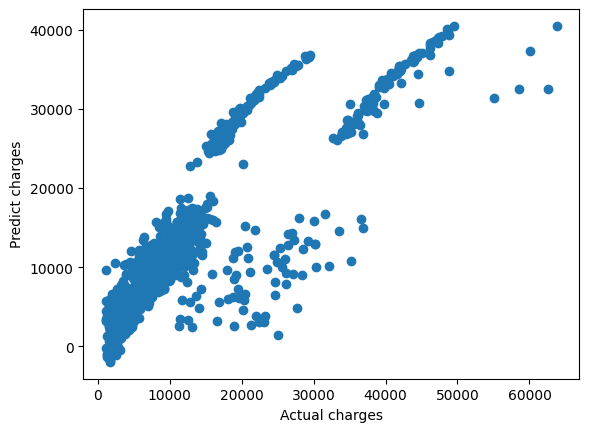

In [93]:
import matplotlib.pyplot as plt
# Model Visualization comparing actual and prediting values
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual charges")
plt.ylabel("Predict charges")

## Accuracy of machine learning model

In [94]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error

# r2
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("Closer to 1 is better (Ranges between 0 and 1)")
print(f"R-squared on Training Data: {r2_train}")
print(f"R-squared on Test Data: {r2_test}")
print('-------------------------------------------------')

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Closer to 0 is better")
print(f"Mean Squared Error on Training Data: {mse_train}")
print(f"Mean Squared Error on Test Data: {mse_test}")
print('-------------------------------------------------')

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("Closer to 0 is better")
print(f"Root Mean Squared Error on Training Data: {rmse_train}")
print(f"Root Mean Squared Error on Test Data: {rmse_test}")
print('-------------------------------------------------')

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Closer to 0 is better")
print(f"Mean Absolute Error on Training Data: {mae_train}")
print(f"Mean Absolute Error on Test Data: {mae_test}")
print('-------------------------------------------------')

Closer to 1 is better (Ranges between 0 and 1)
R-squared on Training Data: 0.7306860719626136
R-squared on Test Data: 0.7911519831922359
-------------------------------------------------
Closer to 0 is better
Mean Squared Error on Training Data: 37969556.20615022
Mean Squared Error on Test Data: 33304881.694371697
-------------------------------------------------
Closer to 0 is better
Root Mean Squared Error on Training Data: 6161.9441904442965
Root Mean Squared Error on Test Data: 5771.03818167682
-------------------------------------------------
Closer to 0 is better
Mean Absolute Error on Training Data: 4249.974832951803
Mean Absolute Error on Test Data: 4013.5473513742777
-------------------------------------------------
